# Illustration of vision transforms

[![View Source On Gitee](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_source_en.svg)](https://gitee.com/mindspore/mindspore/blob/master/docs/api/api_python_en/samples/dataset/vision_gallery.ipynb)

This example illustrates the various transforms available in the [mindspore.dataset.vision](https://www.mindspore.cn/docs/en/master/api_python/mindspore.dataset.transforms.html#module-mindspore.dataset.vision) module.


## Preparation

In [1]:
from download import download
import matplotlib.pyplot as plt
from PIL import Image

import mindspore.dataset as ds
import mindspore.dataset.vision as vision

# Download opensource datasets
url = "https://obs.dualstack.cn-north-4.myhuaweicloud.com/mindspore-website/notebook/datasets/flamingos.jpg"
download(url, './flamingos.jpg', replace=True)
orig_img = Image.open('flamingos.jpg')

# Env set for randomness and prepare plot function
ds.config.set_seed(66)

def plot(imgs, first_origin=True, **kwargs):
    num_rows = 1
    num_cols = len(imgs) + first_origin

    _, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    if first_origin:
        imgs = [orig_img] + imgs
    for idx, img in enumerate(imgs):
        ax = axs[0, idx]
        ax.imshow(img, **kwargs)
        ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if first_origin:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    plt.tight_layout()


file_sizes: 100%|███████████████████████████| 45.8k/45.8k [00:00<00:00, 639kB/s]
Successfully downloaded file to ./flamingos.jpg


## Geometric Transforms

Geometric image transformation refers to the process of altering the geometric properties of an image, such as its shape, size, orientation, or position. It involves applying mathematical operations to the image pixels or coordinates to achieve the desired transformation.

### Pad

The [mindspore.dataset.vision.Pad](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.Pad.html#mindspore.dataset.vision.Pad) transform pads the borders of image with some pixels.

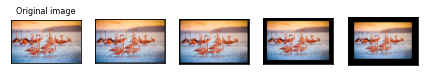

In [2]:
padded_imgs = [vision.Pad(padding=padding)(orig_img) for padding in (3, 10, 30, 50)]
plot(padded_imgs)

### Resize

The [mindspore.dataset.vision.Resize](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.Resize.html#mindspore.dataset.vision.Resize) transform resizes an image to a given size.

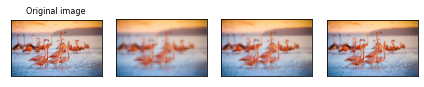

In [3]:
resized_imgs = [vision.Resize(size=size)(orig_img) for size in (30, 50, 100)]
plot(resized_imgs)

### CenterCrop

The [mindspore.dataset.vision.CenterCrop](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.CenterCrop.html#mindspore.dataset.vision.CenterCrop) transform crop the image at the center with given size.

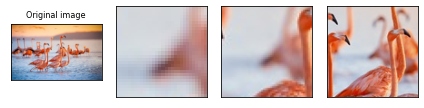

In [4]:
center_crops = [vision.CenterCrop(size=size)(orig_img) for size in (30, 50, 100)]
plot(center_crops)

### FiveCrop

The [mindspore.dataset.vision.FiveCrop](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.FiveCrop.html#mindspore.dataset.vision.FiveCrop) transform crops the given image into one central crop and four corners.

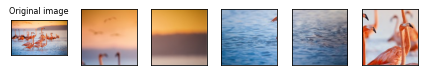

In [5]:
(top_left, top_right, bottom_left, bottom_right, center) = vision.FiveCrop(size=(100, 100))(orig_img)
plot([top_left, top_right, bottom_left, bottom_right, center], True)

### RandomPerspective

The [mindspore.dataset.vision.RandomPerspective](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomPerspective.html#mindspore.dataset.vision.RandomPerspective) transform
performs random perspective transform on an image.

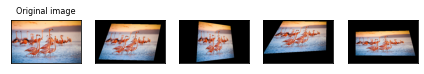

In [6]:
perspective_transformer = vision.RandomPerspective(distortion_scale=0.6, prob=1.0)
perspective_imgs = [perspective_transformer(orig_img) for _ in range(4)]
plot(perspective_imgs)

### RandomRotation

The [mindspore.dataset.vision.RandomRotation](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomRotation.html#mindspore.dataset.vision.RandomRotation) transform
rotates an image with random angle.

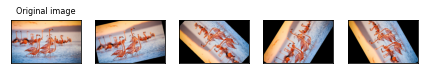

In [7]:
rotater = vision.RandomRotation(degrees=(0, 180))
rotated_imgs = [rotater(orig_img) for _ in range(4)]
plot(rotated_imgs)

### RandomAffine

The [mindspore.dataset.vision.RandomAffine](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomAffine.html#mindspore.dataset.vision.RandomAffine) transform performs random affine transform on an image.

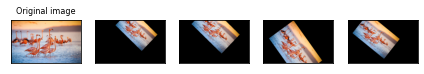

In [8]:
affine_transformer = vision.RandomAffine(degrees=(30, 70), translate=(0.1, 0.3), scale=(0.5, 0.75))
affine_imgs = [affine_transformer(orig_img) for _ in range(4)]
plot(affine_imgs)

### RandomCrop

The [mindspore.dataset.vision.RandomCrop](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomCrop.html#mindspore.dataset.vision.RandomCrop) transform crops an image at a random location.



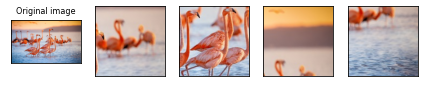

In [9]:
cropper = vision.RandomCrop(size=(128, 128))
crops = [cropper(orig_img) for _ in range(4)]
plot(crops)

### RandomResizedCrop

The [mindspore.dataset.vision.RandomResizedCrop](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomResizedCrop.html#mindspore.dataset.vision.RandomResizedCrop) transform crops an image at a random location, and then resizes the crop to a given
size.

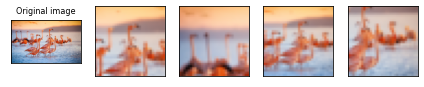

In [10]:
resize_cropper = vision.RandomResizedCrop(size=(32, 32))
resized_crops = [resize_cropper(orig_img) for _ in range(4)]
plot(resized_crops)

## Photometric Transforms

Photometric image transformation refers to the process of modifying the photometric properties of an image, such as its brightness, contrast, color, or tone. These transformations are applied to change the visual appearance of an image while preserving its geometric structure.

### Grayscale

The [mindspore.dataset.vision.Grayscale](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.Grayscale.html#mindspore.dataset.vision.Grayscale) transform converts an image to grayscale.

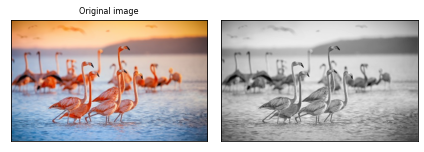

In [11]:
gray_img = vision.Grayscale()(orig_img)
plot([gray_img], cmap='gray')

### RandomColorAdjust

The [mindspore.dataset.vision.RandomColorAdjust](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomColorAdjust.html#mindspore.dataset.vision.RandomColorAdjust) transform randomly changes the brightness, contrast, saturation and hue of the input image.

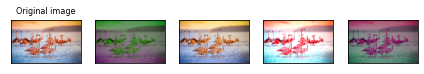

In [12]:
jitter = vision.RandomColorAdjust(brightness=.5, hue=.3)
jitted_imgs = [jitter(orig_img) for _ in range(4)]
plot(jitted_imgs)

### GaussianBlur

The [mindspore.dataset.vision.GaussianBlur](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.GaussianBlur.html#mindspore.dataset.vision.GaussianBlur) transform
performs gaussian blur transform on an image.

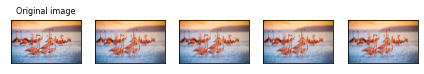

In [13]:
blurrer = vision.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5))
blurred_imgs = [blurrer(orig_img) for _ in range(4)]
plot(blurred_imgs)

### RandomInvert

The [mindspore.dataset.vision.RandomInvert](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomInvert.html#mindspore.dataset.vision.RandomInvert) transform randomly inverts the colors of the given image.



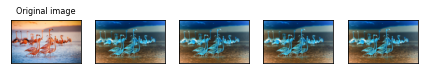

In [14]:
inverter = vision.RandomInvert()
invertered_imgs = [inverter(orig_img) for _ in range(4)]
plot(invertered_imgs)

### RandomPosterize

The [mindspore.dataset.vision.RandomPosterize](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomPosterize.html#mindspore.dataset.vision.RandomPosterize) transform randomly reduces the bit depth of the color channels of image to create a high contrast and vivid color image.


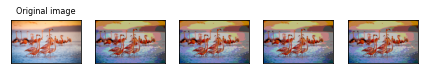

In [15]:
posterizer = vision.RandomPosterize(bits=2)
posterized_imgs = [posterizer(orig_img) for _ in range(4)]
plot(posterized_imgs)

### RandomSolarize

The [mindspore.dataset.vision.RandomSolarize](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomSolarize.html#mindspore.dataset.vision.RandomSolarize) transform randomly solarizes the image by inverting pixel values within specified threshold.



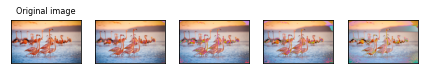

In [16]:
solarizer = vision.RandomSolarize(threshold=(0, 192))
solarized_imgs = [solarizer(orig_img) for _ in range(4)]
plot(solarized_imgs)

### RandomAdjustSharpness

The [mindspore.dataset.vision.RandomAdjustSharpness](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomAdjustSharpness.html#mindspore.dataset.vision.RandomAdjustSharpness) transform randomly adjusts the sharpness of the given image.



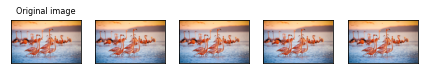

In [17]:
sharpness_adjuster = vision.RandomAdjustSharpness(degree=2)
sharpened_imgs = [sharpness_adjuster(orig_img) for _ in range(4)]
plot(sharpened_imgs)

### RandomAutoContrast

The [mindspore.dataset.vision.RandomAutoContrast](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomAutoContrast.html#mindspore.dataset.vision.RandomAutoContrast) transform randomly applies autocontrast to the given image.

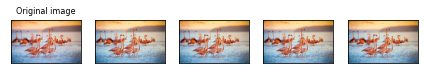

In [18]:
autocontraster = vision.RandomAutoContrast()
autocontrasted_imgs = [autocontraster(orig_img) for _ in range(4)]
plot(autocontrasted_imgs)

### RandomEqualize

The [mindspore.dataset.vision.RandomEqualize](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomEqualize.html#mindspore.dataset.vision.RandomEqualize) transform randomly equalizes the histogram of the given image.



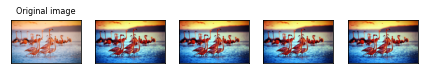

In [19]:
equalizer = vision.RandomEqualize()
equalized_imgs = [equalizer(orig_img) for _ in range(4)]
plot(equalized_imgs)

## Augmentation Transforms

The following transforms are combinations of multiple transforms, they usually come from papers.

### AutoAugment

The [mindspore.dataset.vision.AutoAugment](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.AutoAugment.html#mindspore.dataset.vision.AutoAugment) transform applies AutoAugment  method based on [AutoAugment: Learning Augmentation Strategies from Data](https://arxiv.org/pdf/1805.09501.pdf).

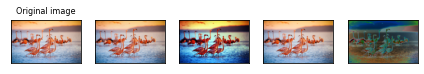

In [20]:
augmenter = vision.AutoAugment(policy=vision.AutoAugmentPolicy.IMAGENET)
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

### RandAugment

The [mindspore.dataset.vision.RandAugment](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandAugment.html#mindspore.dataset.vision.RandAugment) applies RandAugment method based on [RandAugment: Learning Augmentation Strategies from Data](https://arxiv.org/pdf/1909.13719.pdf).



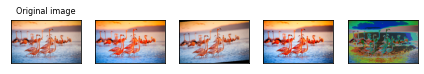

In [21]:
augmenter = vision.RandAugment()
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

### TrivialAugmentWide

The [mindspore.dataset.vision.TrivialAugmentWide](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.TrivialAugmentWide.html#mindspore.dataset.vision.TrivialAugmentWide) applies TrivialAugmentWide method based on [TrivialAugmentWide: Tuning-free Yet State-of-the-Art Data Augmentation](https://arxiv.org/abs/2103.10158).



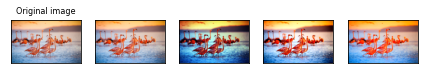

In [22]:
augmenter = vision.TrivialAugmentWide()
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

## Randomly-applied transforms

Some transforms are randomly-applied with a probability. That is, the
transformed image may be the same as the original one.

### RandomHorizontalFlip

The [mindspore.dataset.vision.RandomHorizontalFlip](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomHorizontalFlip.html#mindspore.dataset.vision.RandomHorizontalFlip) transform performs horizontal flip of an image, with a given probability.

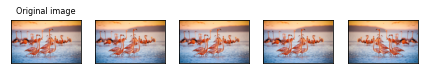

In [23]:
hflipper = vision.RandomHorizontalFlip(0.5)
transformed_imgs = [hflipper(orig_img) for _ in range(4)]
plot(transformed_imgs)

### RandomVerticalFlip

The [mindspore.dataset.vision.RandomVerticalFlip](https://mindspore.cn/docs/en/master/api_python/dataset_vision/mindspore.dataset.vision.RandomVerticalFlip.html#mindspore.dataset.vision.RandomVerticalFlip) transform performs vertical flip of an image, with a given probability.

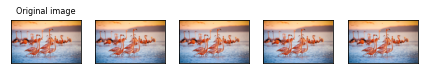

In [24]:
vflipper = vision.RandomVerticalFlip(0.5)
transformed_imgs = [vflipper(orig_img) for _ in range(4)]
plot(transformed_imgs)

### RandomApply

The [mindspore.dataset.transforms.RandomApply](https://mindspore.cn/docs/en/master/api_python/dataset_transforms/mindspore.dataset.transforms.RandomApply.html#mindspore.dataset.transforms.RandomApply)  transform randomly applies a list of transforms, with a given probability.

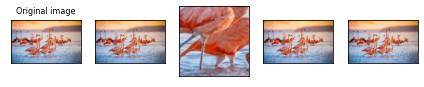

In [25]:
import mindspore.dataset.transforms as T

applier = T.RandomApply(transforms=[vision.RandomCrop(size=(64, 64))], prob=0.5)
transformed_imgs = [applier(orig_img) for _ in range(4)]
plot(transformed_imgs)

## Process Image File In Dataset Pipeline

Use the [mindspore.dataset.ImageFolderDataset](https://mindspore.cn/docs/en/master/api_python/dataset/mindspore.dataset.ImageFolderDataset.html#mindspore.dataset.ImageFolderDataset) to read image content into dataset pipeline and then we can do further transforms based on pipeline.


file_sizes: 100%|███████████████████████████| 45.7k/45.7k [00:00<00:00, 996kB/s]
Extracting zip file...
Successfully downloaded / unzipped to ./
column names: ['image', 'label']
>>>>> after decode
(64, 64, 3) 0
(64, 64, 3) 0
(64, 64, 3) 0
(64, 64, 3) 1
(64, 64, 3) 1
(64, 64, 3) 1
(64, 64, 3) 1
(64, 64, 3) 2
(64, 64, 3) 2
(64, 64, 3) 2
(64, 64, 3) 3
(64, 64, 3) 3
(64, 64, 3) 3
(64, 64, 3) 4
(64, 64, 3) 4
(64, 64, 3) 4
>>>>> after resize
(48, 48, 3) 0
(48, 48, 3) 0
(48, 48, 3) 0
(48, 48, 3) 1
(48, 48, 3) 1
(48, 48, 3) 1
(48, 48, 3) 1
(48, 48, 3) 2
(48, 48, 3) 2
(48, 48, 3) 2
(48, 48, 3) 3
(48, 48, 3) 3
(48, 48, 3) 3
(48, 48, 3) 4
(48, 48, 3) 4
(48, 48, 3) 4


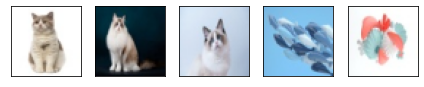

In [26]:
from download import download

import os
import mindspore.dataset as ds

# Download a small imagenet as example
url = "https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/datasets/imageset.zip"
download(url, "./", kind="zip", replace=True)

# There are 5 classes in the image folder.
os.listdir("./imageset")

# Load these 5 classes into dataset pipeline
dataset = ds.ImageFolderDataset("./imageset", shuffle=False)

# check the column names inside the dataset. "image" column represents the image content and "label" column represents the corresponding label of image.
print("column names:", dataset.get_col_names())

# since the original image is not decoded, apply decode first on "image" column
dataset = dataset.map(vision.Decode(), input_columns=["image"])

# check results
print(">>>>> after decode")
for data, label in dataset:
    print(data.shape, label)

# let's do some transforms on dataset
# apply resize on images
dataset = dataset.map(vision.Resize(size=(48, 48)), input_columns=["image"])

# check results
print(">>>>> after resize")
images = []
for image, label in dataset:
    images.append(image.asnumpy())
    print(image.shape, label)

plot(images[:5], first_origin=False)